In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [13]:
df = pd.read_csv("D:\\maincrafts\\train_and_test2.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1309, 28)


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
2urvived       0
dtype: int64


C:\Users\MOHAN SAI YALAVARTHI\AppData\Local\Temp\ipykernel_18640\1483934729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='2urvived', data=df, palette="Set2", errorbar=None)


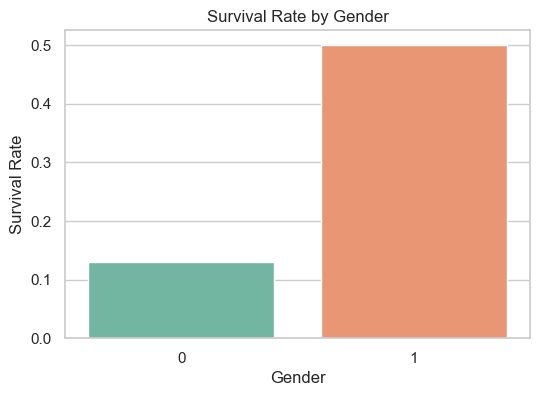

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='2urvived', data=df, palette="Set2", errorbar=None)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

C:\Users\MOHAN SAI YALAVARTHI\AppData\Local\Temp\ipykernel_18640\1815935108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='2urvived', data=df, palette="muted", errorbar=None)


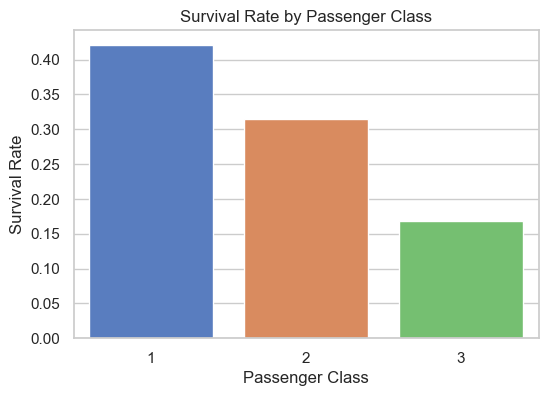

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='2urvived', data=df, palette="muted", errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


Survival Rate by Age Group:
AgeGroup
Child (0-12)     0.425532
Teen (13-19)     0.297710
Adult (20-40)    0.242707
Senior (40+)     0.242291
Name: 2urvived, dtype: float64


C:\Users\MOHAN SAI YALAVARTHI\AppData\Local\Temp\ipykernel_18640\4216620937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='2urvived', data=df, palette="viridis", errorbar=None)


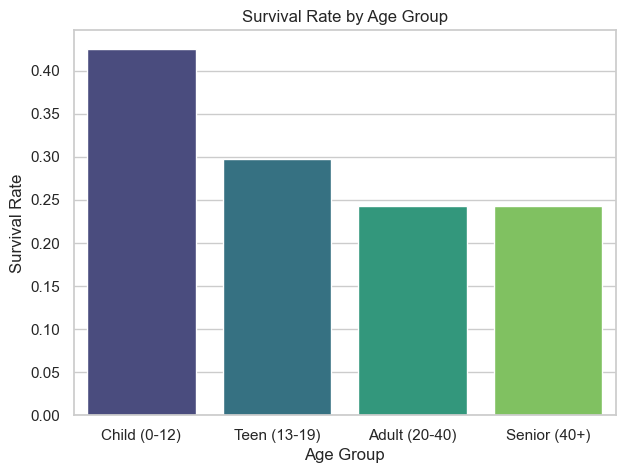

In [17]:
bins = [0, 12, 19, 40, 80]
labels = ['Child (0-12)', 'Teen (13-19)', 'Adult (20-40)', 'Senior (40+)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

agegroup_survival = df.groupby('AgeGroup', observed=True)['2urvived'].mean()
print("\nSurvival Rate by Age Group:")
print(agegroup_survival)

plt.figure(figsize=(7,5))
sns.barplot(x='AgeGroup', y='2urvived', data=df, palette="viridis", errorbar=None)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

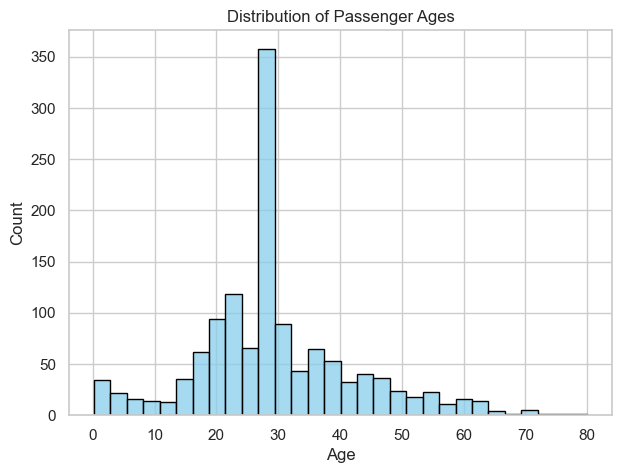

In [18]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins=30, kde=False, color="skyblue", edgecolor="black")
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [19]:

# Drop irrelevant columns
df = df.drop(columns=['Cabin', 'Ticket', 'Name'], errors='ignore')
print("Remaining columns after dropping:", df.columns.tolist())


Remaining columns after dropping: ['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived', 'AgeGroup']



Survival Rate by Embarkation Port:
Embarked
0.0    0.344444
1.0    0.243902
2.0    0.239083
Name: 2urvived, dtype: float64


C:\Users\MOHAN SAI YALAVARTHI\AppData\Local\Temp\ipykernel_18640\3252835132.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='2urvived', data=df, palette="pastel", errorbar=None)


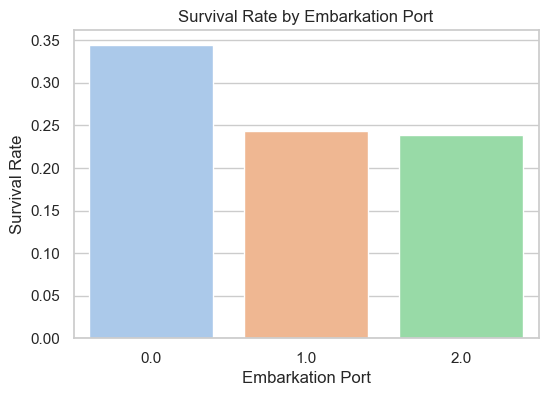

In [20]:

# Survival Rate by Embarkation Port
embarked_survival = df.groupby('Embarked')['2urvived'].mean()
print("\nSurvival Rate by Embarkation Port:")
print(embarked_survival)

plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='2urvived', data=df, palette="pastel", errorbar=None)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()


Created FamilySize column from sibsp and Parch

Survival Rate by Family Size:
FamilySize
0     0.206329
1     0.378723
2     0.371069
3     0.488372
4     0.136364
5     0.120000
6     0.250000
7     0.000000
10    0.000000
Name: 2urvived, dtype: float64


C:\Users\MOHAN SAI YALAVARTHI\AppData\Local\Temp\ipykernel_18640\1499389210.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='2urvived', data=df, palette="coolwarm", errorbar=None)


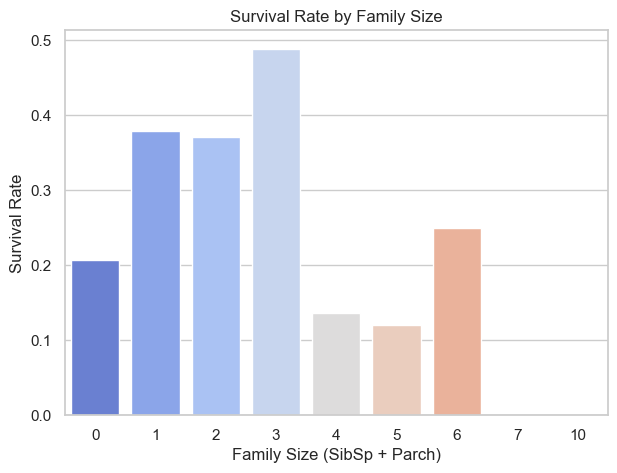

In [21]:
# Check available columns and adapt
cols = [c.lower() for c in df.columns]

# Try to find SibSp and Parch (case-insensitive)
sibsp_col = [c for c in df.columns if 'sib' in c.lower()]
parch_col = [c for c in df.columns if 'parch' in c.lower()]

if sibsp_col and parch_col:
    df['FamilySize'] = df[sibsp_col[0]] + df[parch_col[0]]
    print("Created FamilySize column from", sibsp_col[0], "and", parch_col[0])

    # Survival rate by family size
    family_survival = df.groupby('FamilySize')['2urvived'].mean()
    print("\nSurvival Rate by Family Size:")
    print(family_survival)

    plt.figure(figsize=(7,5))
    sns.barplot(x='FamilySize', y='2urvived', data=df, palette="coolwarm", errorbar=None)
    plt.title("Survival Rate by Family Size")
    plt.xlabel("Family Size (SibSp + Parch)")
    plt.ylabel("Survival Rate")
    plt.show()
else:
    print("Could not find SibSp or Parch columns in dataset. Available columns:", df.columns.tolist())


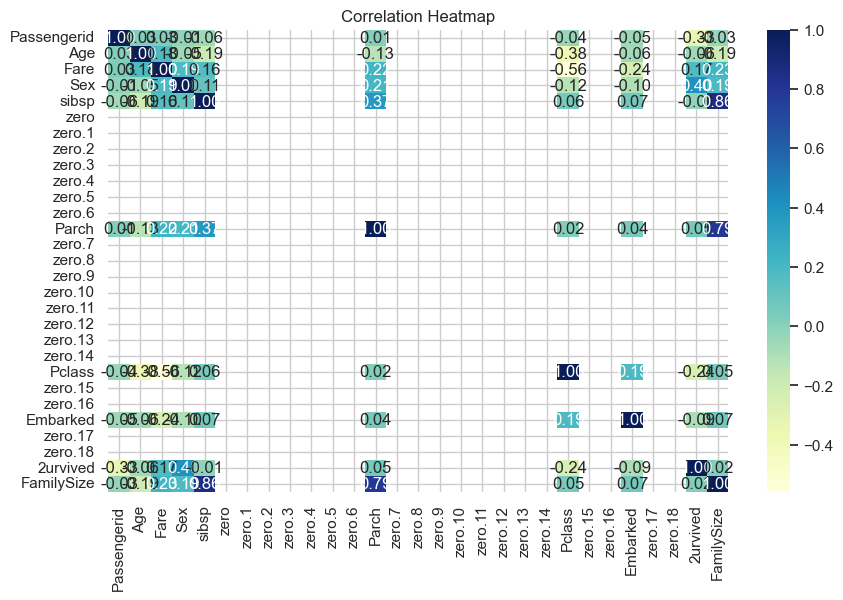

In [22]:

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
